### Low rank approximation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data, covert that into a convenient data
PATH= '/home/ac-optimus/data_science/recommendation_sys/ratings.csv'
df = pd.read_csv(PATH, sep= ",")[:100000] # taking 100000 user-movie rating tuples
# df = pd.read_csv(PATH, sep= ",")
df.shape

(100000, 4)

In [3]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [4]:
# shuffling the data
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
df.head()

,userId,movieId,rating
35104,390,3328,4.0
21948,251,3108,2.5
85637,855,1221,5.0
82327,836,2470,4.0
27582,332,1485,2.5


In [31]:
# train - 80% of the data.
num_rows = df.shape[0]
train, test = df.copy(deep = True), df[int(num_rows*0.8):].copy(deep = True)
train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0
train = shuffle(train)

In [7]:
# creating user-movie rating utility matrix
user_movie_rating =train.groupby(['userId','movieId'])['rating'].max().unstack().fillna(0)
user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,173209,173291,173353,174055,174231,174393,174585,174843,175579,176271
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



- Null values replaced  with zeros

In [9]:
def low_rank_k(rank, u, s, v):
    # SVD 
    u_new = u[:,:rank]
    v_new = v[:rank, :]
    s_new = s[:rank]
    singular_mat = np.diag(s_new)
    low_rank_mat = np.dot(np.dot(u_new, singular_mat), v_new)
    return low_rank_mat

In [10]:
def error(y_hat, y):
    # MSE
    y_hat = np.array(y_hat)
    y = np.array(y)
    MSE_ = (y_hat- y)**2
    MSE = MSE_.sum()
    return MSE

In [32]:
# computing error and the graph
u, s, v = np.linalg.svd(user_movie_rating, full_matrices=False)
y= test['rating']
errors = []
for k in range(0, 100):
    Pred = low_rank_k(k, u, s, v)
    Pred = pd.DataFrame(Pred, columns=user_movie_rating.columns, index= user_movie_rating.index)
    y_hat = [Pred.loc[int(test.iloc[i]['userId']), int(test.iloc[i]['movieId'])] 
             for i in range(len(test))]    
    error_i = error(y_hat, y)
    errors.append(error_i)

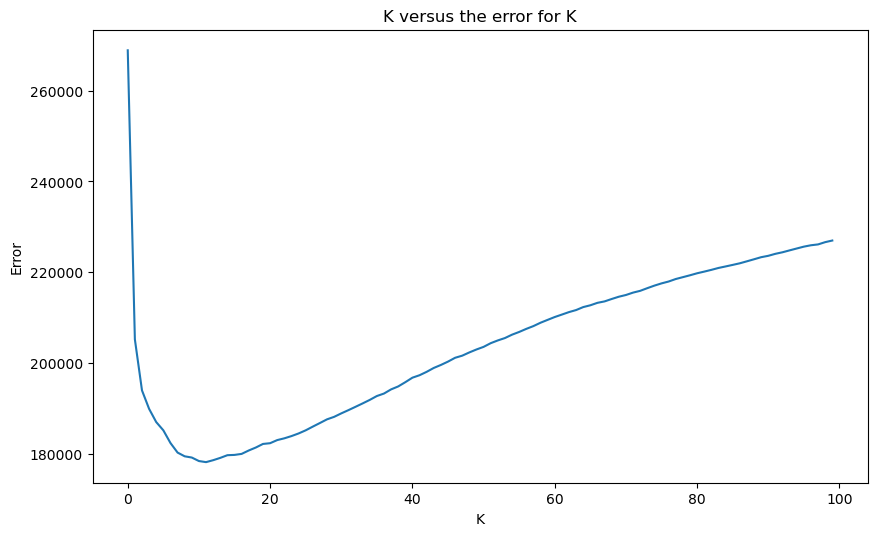

In [33]:
# plot
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(np.array(errors));
plt.xlabel('K')
plt.ylabel('Error');
plt.title('K versus the error for K');